# Bird Classification

## <ins>The Dataset:</ins>

<font size="4">  The dataset consists of information on 420 birds, which are classified into six categories: swimming birds (SW), waders (W), land birds (T), raptors (R), scanner birds (P), and songbirds (SO). It includes 10 continuous float-type measurements (in millimeters) that are used to characterise each bird.</font>

### Bird Bone Measurements :

            huml : the length of humerus
            humw : the diameter of humerus
            ulnal : the length of ulna
            ulnaw : the diameter of ulna
            feml : the length of femur
            femw : the diameter of femur
            tibl : the length of tibiotarsus
            tibw : the diameter of tibiotarsus
            tarl : the length of tarsometatarsus
            tarw : the diameter of tarsometatarsus

### Ecological group :

            SW : Swimming Birds
            W : Wading Birds
            T : Terrestrial Birds
            R : Raptors
            P : Scansorial Birds
            SO : Singing Birds

## Exploratory Data Analysis (EDA) :

In [1]:
# Importing Necessary Libraries
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Create a dataframe called Birds, this will read the csv file and store it in a variable
Birds = pd.read_csv('/kaggle/input/birds-bones-and-living-habits/bird.csv')
Birds

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,SW
1,1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW
2,2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW
3,3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW
4,4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW
...,...,...,...,...,...,...,...,...,...,...,...,...
415,415,17.96,1.63,19.25,1.33,18.36,1.54,31.25,1.33,21.99,1.15,SO
416,416,19.21,1.64,20.76,1.49,19.24,1.45,33.21,1.28,23.60,1.15,SO
417,417,18.79,1.63,19.83,1.53,20.96,1.43,34.45,1.41,22.86,1.21,SO
418,418,20.38,1.78,22.53,1.50,21.35,1.48,36.09,1.53,25.98,1.24,SO


In [3]:
# Display first five rows of dataframe
Birds.head()

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,SW
1,1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW
2,2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW
3,3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW
4,4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW


In [4]:
# Display last five rows of dataframe
Birds.tail()

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
415,415,17.96,1.63,19.25,1.33,18.36,1.54,31.25,1.33,21.99,1.15,SO
416,416,19.21,1.64,20.76,1.49,19.24,1.45,33.21,1.28,23.60,1.15,SO
417,417,18.79,1.63,19.83,1.53,20.96,1.43,34.45,1.41,22.86,1.21,SO
418,418,20.38,1.78,22.53,1.50,21.35,1.48,36.09,1.53,25.98,1.24,SO
419,419,17.89,1.44,19.26,1.10,17.62,1.34,29.81,1.24,21.69,1.05,SO


In [5]:
# get the shape of dataframe
Birds.shape

(420, 12)

In [6]:
# get the datatype of the each column in the dataframe
Birds.dtypes

id         int64
huml     float64
humw     float64
ulnal    float64
ulnaw    float64
feml     float64
femw     float64
tibl     float64
tibw     float64
tarl     float64
tarw     float64
type      object
dtype: object

In [7]:
# get the statstics of the dataframe
Birds.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,420.0,209.500000,121.387808,0.00,104.7500,209.500,314.250,419.00
huml,419.0,64.650501,53.834549,9.85,25.1700,44.180,90.310,420.00
humw,419.0,4.370573,2.854617,1.14,2.1900,3.500,5.810,17.84
ulnal,417.0,69.115372,58.784775,14.09,28.0500,43.710,97.520,422.00
ulnaw,418.0,3.597249,2.186747,1.00,1.8700,2.945,4.770,12.00
feml,418.0,36.872416,19.979082,11.83,21.2975,31.130,47.120,117.07
femw,419.0,3.220883,2.023581,0.93,1.7150,2.520,4.135,11.64
tibl,418.0,64.662823,37.838145,5.50,36.4175,52.120,82.870,240.00
tibw,419.0,3.182339,2.080827,0.87,1.5650,2.490,4.255,11.03
tarl,419.0,39.229976,23.184313,7.77,23.0350,31.740,50.250,175.00


<font size="3">     The output of the **describe()** function indicates that there are missing values in the dataset. This can be inferred from the count column, which shows that some columns have fewer values than the total number of instances in the dataset, 420. Additionally, based on the mean and max columns, it can be inferred that there are outliers present in the data. The mean column shows the average value of each column, while the max column shows the maximum value of each column. If the maximum value is significantly higher than the mean, it may indicate the presence of outliers. This is because the mean is sensitive to outliers</font>

In [8]:
#This will drop the "id"
Birds = Birds.drop('id', axis=1)

### <ins>Data Skewing :</ins>

<font size="3">Data skewing is typically used when analyzing a dataset to determine if the distribution of values is symmetric or skewed.</font>

In [9]:
# Select only numeric columns
numeric_columns = Birds.select_dtypes(include=['number'])

# Compute the skewness and sort the results
skewness = numeric_columns.skew().sort_values(ascending=False)

print(skewness)

ulnal    2.091798
huml     2.027896
tarl     1.942084
tarw     1.821653
tibl     1.527355
humw     1.492614
femw     1.295833
tibw     1.252083
ulnaw    1.235632
feml     1.220858
dtype: float64


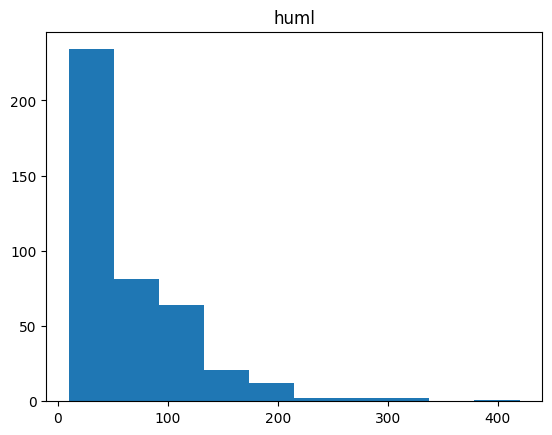

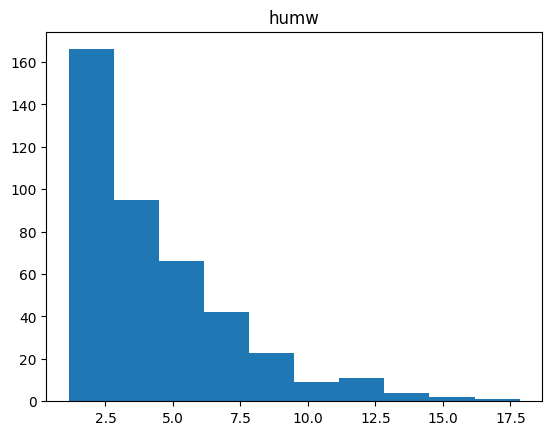

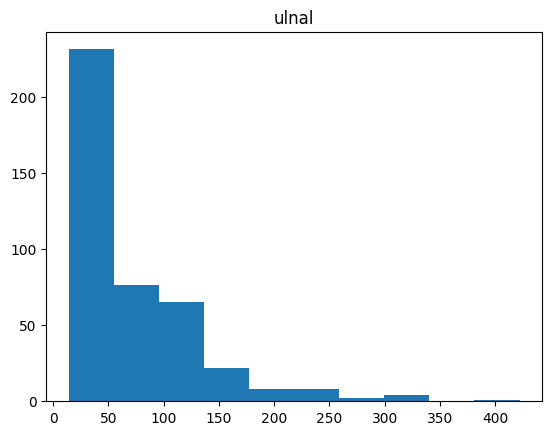

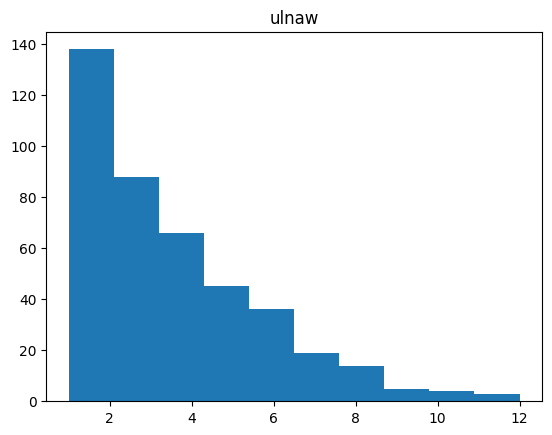

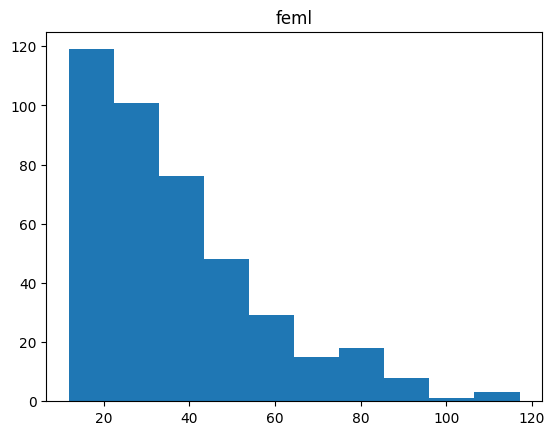

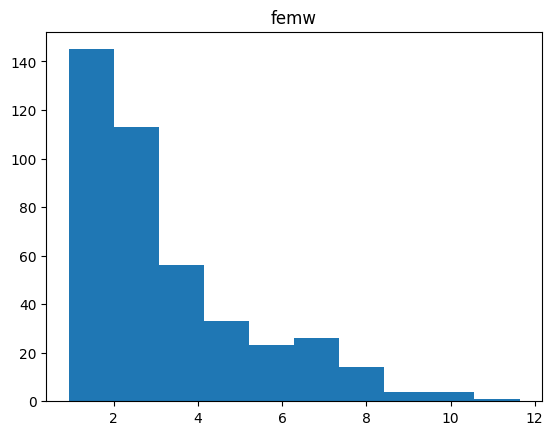

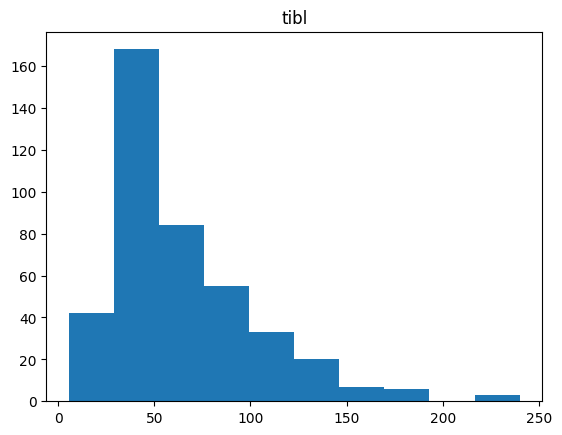

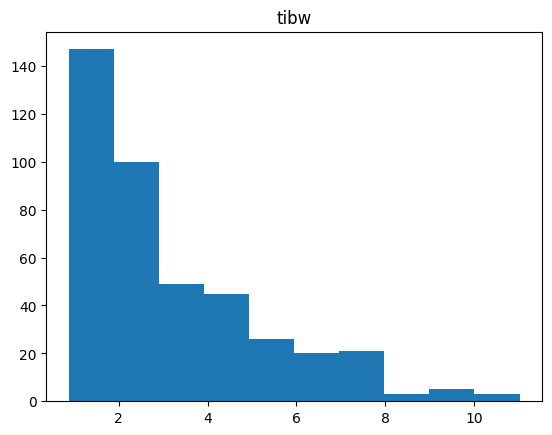

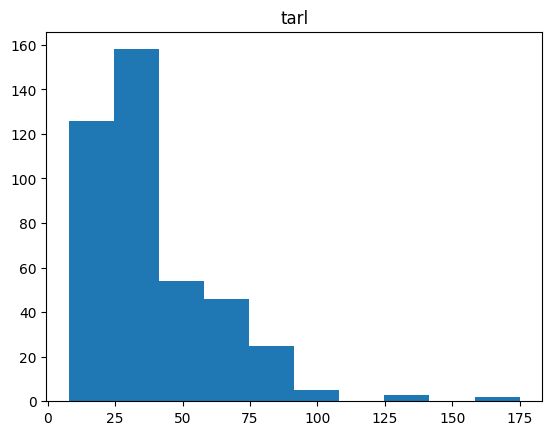

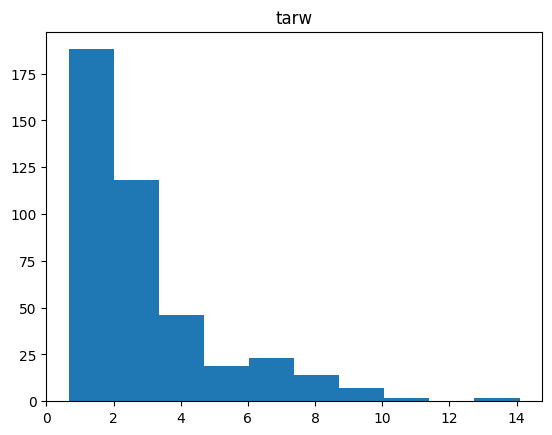

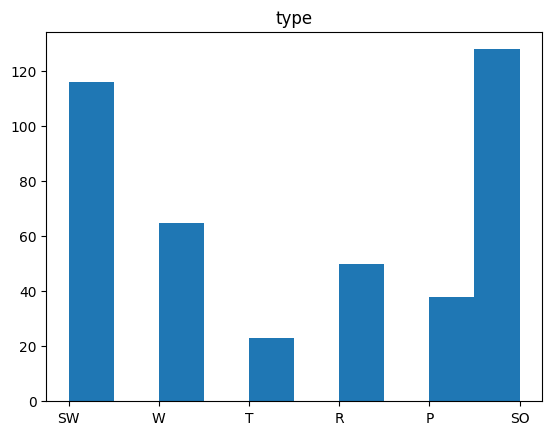

In [10]:
# Plot the histogram for each feature
for col in Birds.columns:
    plt.hist(Birds[col])
    plt.title(col)
    plt.show()

<font size="3">The skewness values of each column in the dataframe are greater than 0, which indicates that the data is positively skewed. Positive skewness means that more of the tail is on the right side of the probability density function, meaning that there is a longer tail of large values. This can cause issues when building models as some models assume that the data is normally distributed. Therefore, it is important to address data skewness by transforming the data in order to improve the accuracy of the models.</font>

### <ins>Checking for missing values :</ins>

In [11]:
Birds.isnull().sum()

huml     1
humw     1
ulnal    3
ulnaw    2
feml     2
femw     1
tibl     2
tibw     1
tarl     1
tarw     1
type     0
dtype: int64

<Axes: >

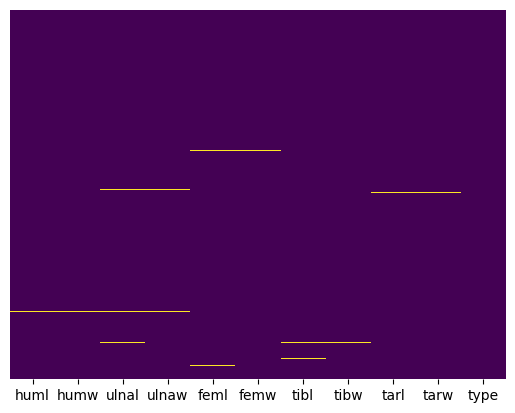

In [12]:
# heatmap is used to visualise the missing values by a yellow lines.
sns.heatmap(Birds.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<font size="3">The output of the isnull function shows that there are missing values in some columns of the dataframe. One missing value in huml, humw, femw, tibw, tarl, and tarw columns, two in ulnaw, feml, and tibl columns, and three in ulnal column.</font>

In [13]:
# get the count of each unique value in the "type" column of the dataframe
plot = Birds["type"].value_counts()
print(plot)

type
SO    128
SW    116
W      65
R      50
P      38
T      23
Name: count, dtype: int64


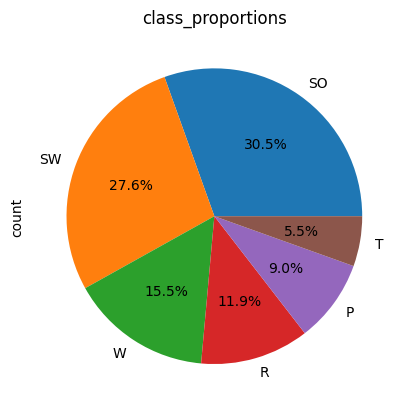

In [14]:
#graph class proportions in the dataset
Birds['type'].value_counts().plot(kind='pie',autopct='%1.1f%%');
plt.title('class_proportions');

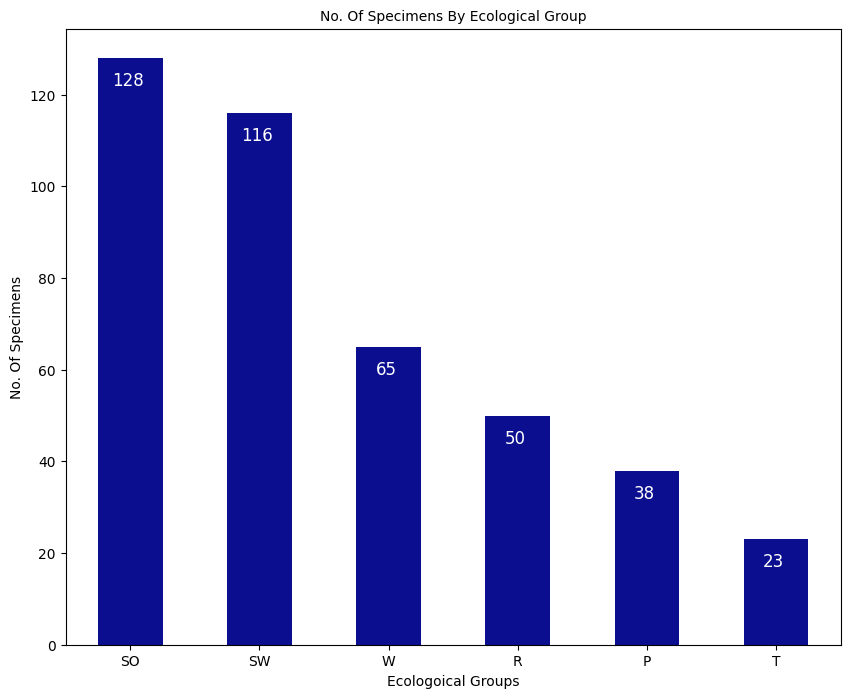

In [15]:
# group the dataframe based on "type" column and get the size of each group

size_of_each_group = Birds.groupby("type").size().sort_values(ascending=False)

#create a bar plot of the dataframe grouped by "type" column
ax = size_of_each_group.plot(
    kind="bar", 
    color="#0B0F8F",
    figsize=((10 , 8)),
    rot=0
)

ax.set_title("No. Of Specimens By Ecological Group", fontsize=10)
ax.set_xlabel("Ecologoical Groups")
ax.set_ylabel("No. Of Specimens")
for x, y in zip(np.arange(0, len(size_of_each_group)), size_of_each_group):
    ax.annotate("{:d}".format(y), xy=(x-(0.14 if len(str(y)) == 3 else 0.1), y-6), fontsize=12, color="#FFFFFF")

### <ins> Analysing Different features:</ins>

<Axes: xlabel='type', ylabel='huml'>

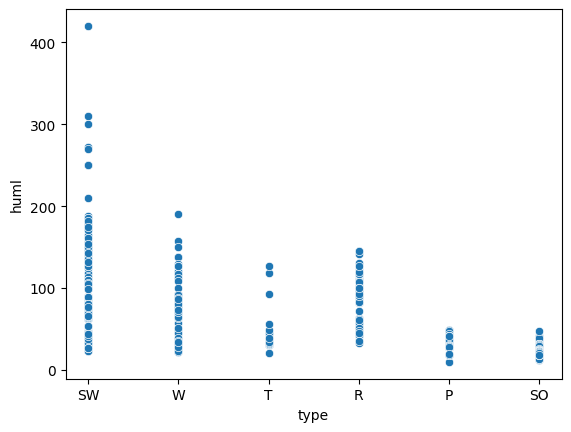

In [16]:
sns.scatterplot(data=Birds, x="type", y="huml")

<Axes: xlabel='type', ylabel='humw'>

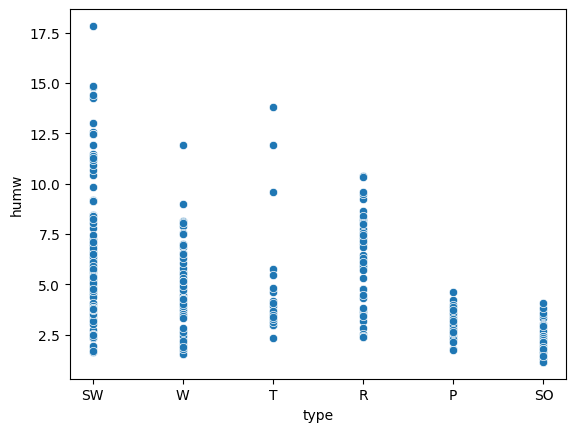

In [17]:
sns.scatterplot(data=Birds, x="type", y="humw")

<Axes: xlabel='type', ylabel='ulnal'>

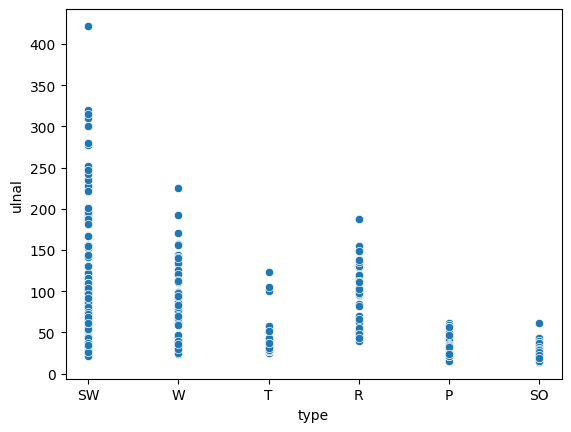

In [18]:
sns.scatterplot(data=Birds, x="type", y="ulnal")

<Axes: xlabel='type', ylabel='ulnaw'>

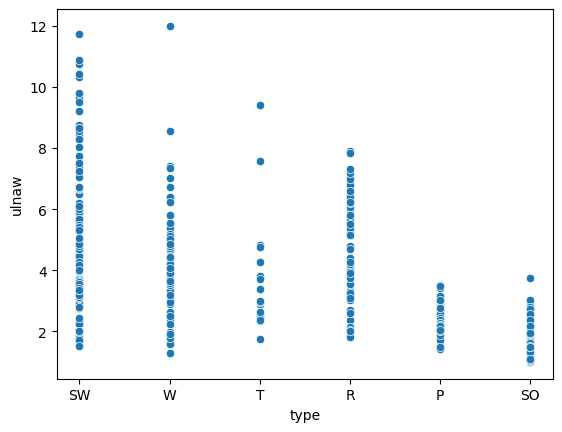

In [19]:
sns.scatterplot(data=Birds, x="type", y="ulnaw")

<Axes: xlabel='type', ylabel='feml'>

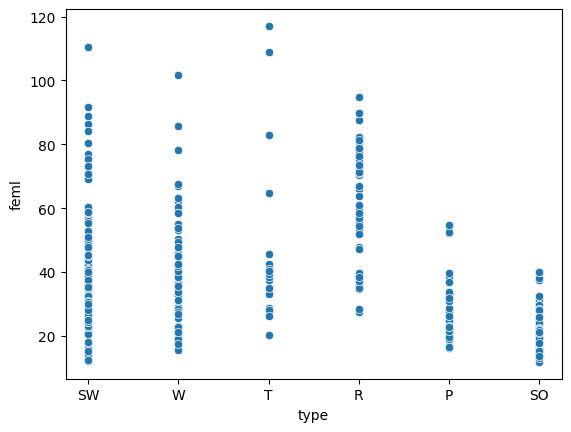

In [20]:
sns.scatterplot(data=Birds, x="type", y="feml")

<Axes: xlabel='type', ylabel='femw'>

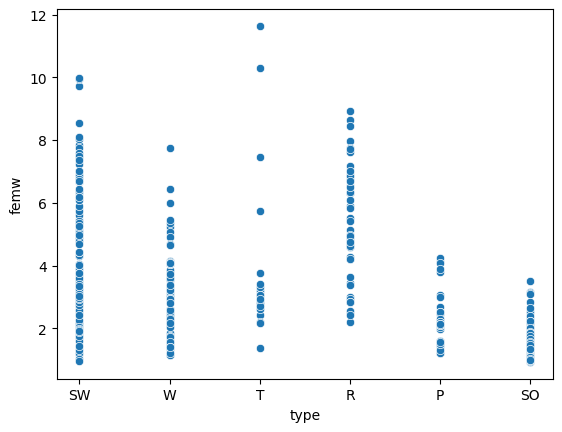

In [21]:
sns.scatterplot(data=Birds, x="type", y="femw")

<Axes: xlabel='type', ylabel='tibl'>

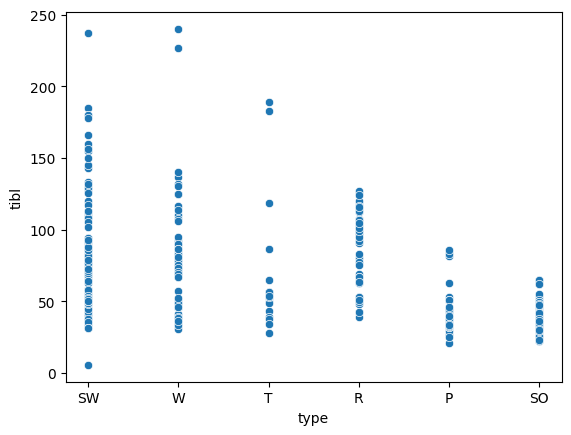

In [22]:
sns.scatterplot(data=Birds, x="type", y="tibl")

<Axes: xlabel='type', ylabel='tibw'>

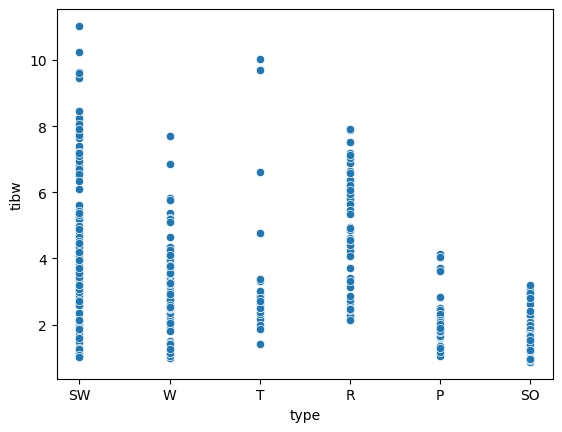

In [23]:
sns.scatterplot(data=Birds, x="type", y="tibw")

<Axes: xlabel='type', ylabel='tarl'>

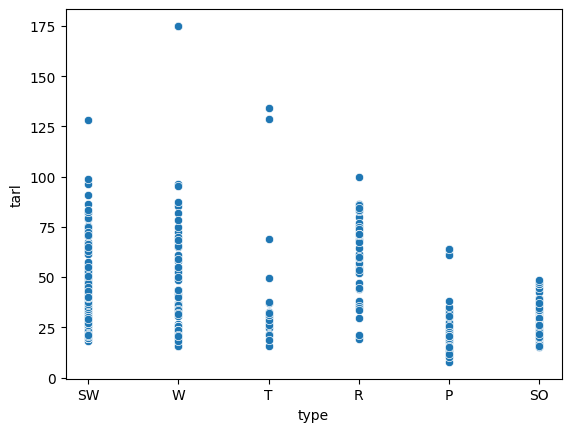

In [24]:
sns.scatterplot(data=Birds, x="type", y="tarl")

<Axes: xlabel='type', ylabel='tarw'>

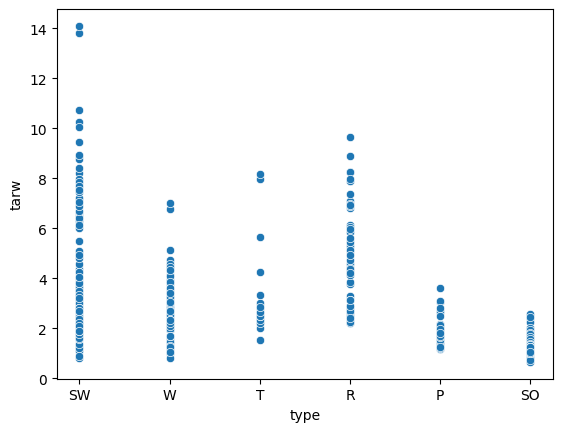

In [25]:
sns.scatterplot(data=Birds, x="type", y="tarw")

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Birds[['huml', 'humw', 'ulnal' , 'ulnaw' , 'feml' , 'femw' , 'tibl' , 'tibw' , 'tarl' , 'tarw']] = scaler.fit_transform(Birds[['huml', 'humw', 'ulnal' , 'ulnaw' , 'feml' , 'femw' , 'tibl' , 'tibw' , 'tarl' , 'tarw']])

### Check and Compare the correlation of the features:

<font size ="3">The **corr()** function is used to determine the pairwise correlation between columns in a dataframe. A correlation heatmap can be created from the output to visualize the correlation values.</font>

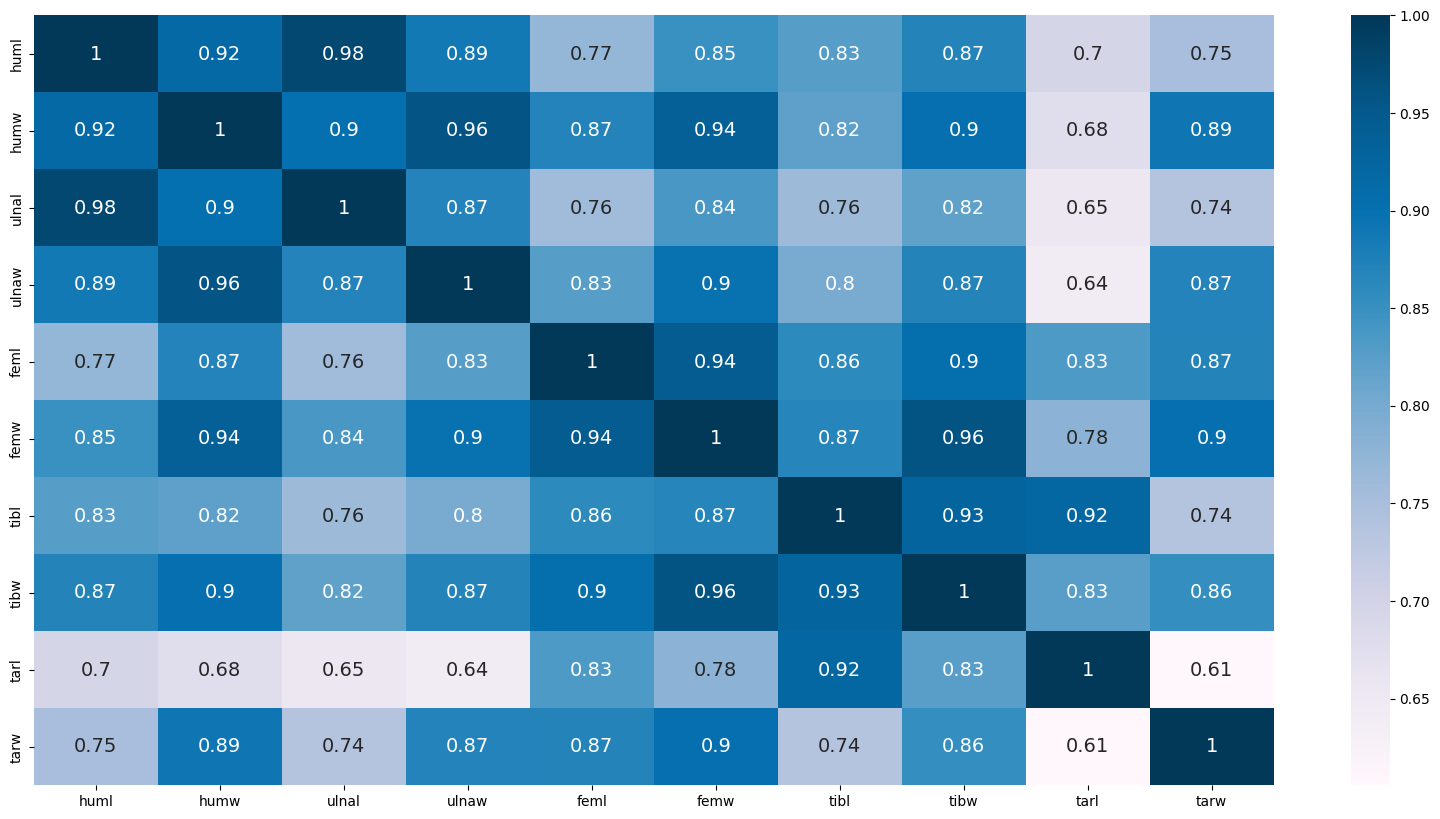

In [27]:
# Select only numeric columns
numeric_columns = Birds.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, annot=True, cmap='PuBu', annot_kws={'size':14})
plt.show()

<font size="3">From the correlation heatmap, some columns have a high correlation, such as ulnal and huml with 0.98 correlation, this indicates that they contain similar information, in this case one of them should be removed during feature selection.</font>

In [28]:
#select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
print(upper)

       huml      humw     ulnal     ulnaw      feml      femw      tibl  \
huml    NaN  0.916572  0.976377  0.887025  0.771054  0.850474  0.826899   
humw    NaN       NaN  0.900770  0.957790  0.871023  0.936179  0.820093   
ulnal   NaN       NaN       NaN  0.871604  0.759309  0.837922  0.761994   
ulnaw   NaN       NaN       NaN       NaN  0.826243  0.898133  0.797017   
feml    NaN       NaN       NaN       NaN       NaN  0.944668  0.859952   
femw    NaN       NaN       NaN       NaN       NaN       NaN  0.868170   
tibl    NaN       NaN       NaN       NaN       NaN       NaN       NaN   
tibw    NaN       NaN       NaN       NaN       NaN       NaN       NaN   
tarl    NaN       NaN       NaN       NaN       NaN       NaN       NaN   
tarw    NaN       NaN       NaN       NaN       NaN       NaN       NaN   

           tibw      tarl      tarw  
huml   0.869339  0.695027  0.751122  
humw   0.901478  0.676207  0.892047  
ulnal  0.818507  0.653622  0.737557  
ulnaw  0.870392  0.642

In [29]:
drop_feature = [column for column in upper.columns if any(upper[column] > 0.95)]
print(drop_feature)

['ulnal', 'ulnaw', 'tibw']


In [30]:
# Drop Features ulnal, ulnaw , tibw
for i in drop_feature:
    Birds = Birds.drop (i, axis=1)
Birds

,huml,humw,feml,femw,tibl,tarl,tarw,type
0,0.172937,0.331737,0.284873,0.258637,0.000000,0.184955,0.236783,SW
1,0.192759,0.328743,0.334569,0.314659,0.318635,0.201698,0.249442,SW
2,0.170962,0.313174,0.296845,0.277311,0.297868,0.182623,0.199553,SW
3,0.165305,0.273054,0.268054,0.241830,0.271514,0.167494,0.204765,SW
4,0.129099,0.221557,0.210186,0.167134,0.216503,0.144173,0.183917,SW
...,...,...,...,...,...,...,...,...
415,0.019773,0.029341,0.062049,0.056956,0.109808,0.085033,0.036485,SO
416,0.022821,0.029940,0.070410,0.048553,0.118166,0.094660,0.036485,SO
417,0.021797,0.029341,0.086754,0.046685,0.123454,0.090235,0.040953,SO
418,0.025674,0.038323,0.090460,0.051354,0.130448,0.108892,0.043187,SO


<font size="3">In this case, **three features** were found to have high correlation with other features, and as a result, they were removed. They are: ulnal, ulnaw, and tibw. This helps to reduce the number of variables and improve the performance of the model by preventing redundant information and avoiding overfitting.</font>

In [31]:
# Convert inf values to NaN
Birds.replace([np.inf, -np.inf], np.nan, inplace=True)

### <ins>Cleaning the data:</ins>

<font size="3">The missing values in some columns of the dataframe must be handled. Since the size of the data is not large, **replacing the missing values with the mean** of the column is a good solution. This will maintain the overall distribution of the data while filling in the missing values.</font>

In [32]:
# Calculate the mean only for numeric columns
numeric_cols = Birds.select_dtypes(include=[np.number]).columns
mean_values = Birds[numeric_cols].mean()

# Fill missing values with the mean for numeric columns
Birds[numeric_cols] = Birds[numeric_cols].fillna(mean_values)

In [33]:
Birds

,huml,humw,feml,femw,tibl,tarl,tarw,type
0,0.172937,0.331737,0.284873,0.258637,0.000000,0.184955,0.236783,SW
1,0.192759,0.328743,0.334569,0.314659,0.318635,0.201698,0.249442,SW
2,0.170962,0.313174,0.296845,0.277311,0.297868,0.182623,0.199553,SW
3,0.165305,0.273054,0.268054,0.241830,0.271514,0.167494,0.204765,SW
4,0.129099,0.221557,0.210186,0.167134,0.216503,0.144173,0.183917,SW
...,...,...,...,...,...,...,...,...
415,0.019773,0.029341,0.062049,0.056956,0.109808,0.085033,0.036485,SO
416,0.022821,0.029940,0.070410,0.048553,0.118166,0.094660,0.036485,SO
417,0.021797,0.029341,0.086754,0.046685,0.123454,0.090235,0.040953,SO
418,0.025674,0.038323,0.090460,0.051354,0.130448,0.108892,0.043187,SO


In [34]:
#Checking if the values have been replaced
Birds.isnull().sum()

huml    0
humw    0
feml    0
femw    0
tibl    0
tarl    0
tarw    0
type    0
dtype: int64

### Detecting outliers of each feature:

<font size="3">This code helps to visualise remove data that is outside the range of typical values, outliers can have a big impact on the performance of the model, and thus it's important to remove them.</font>

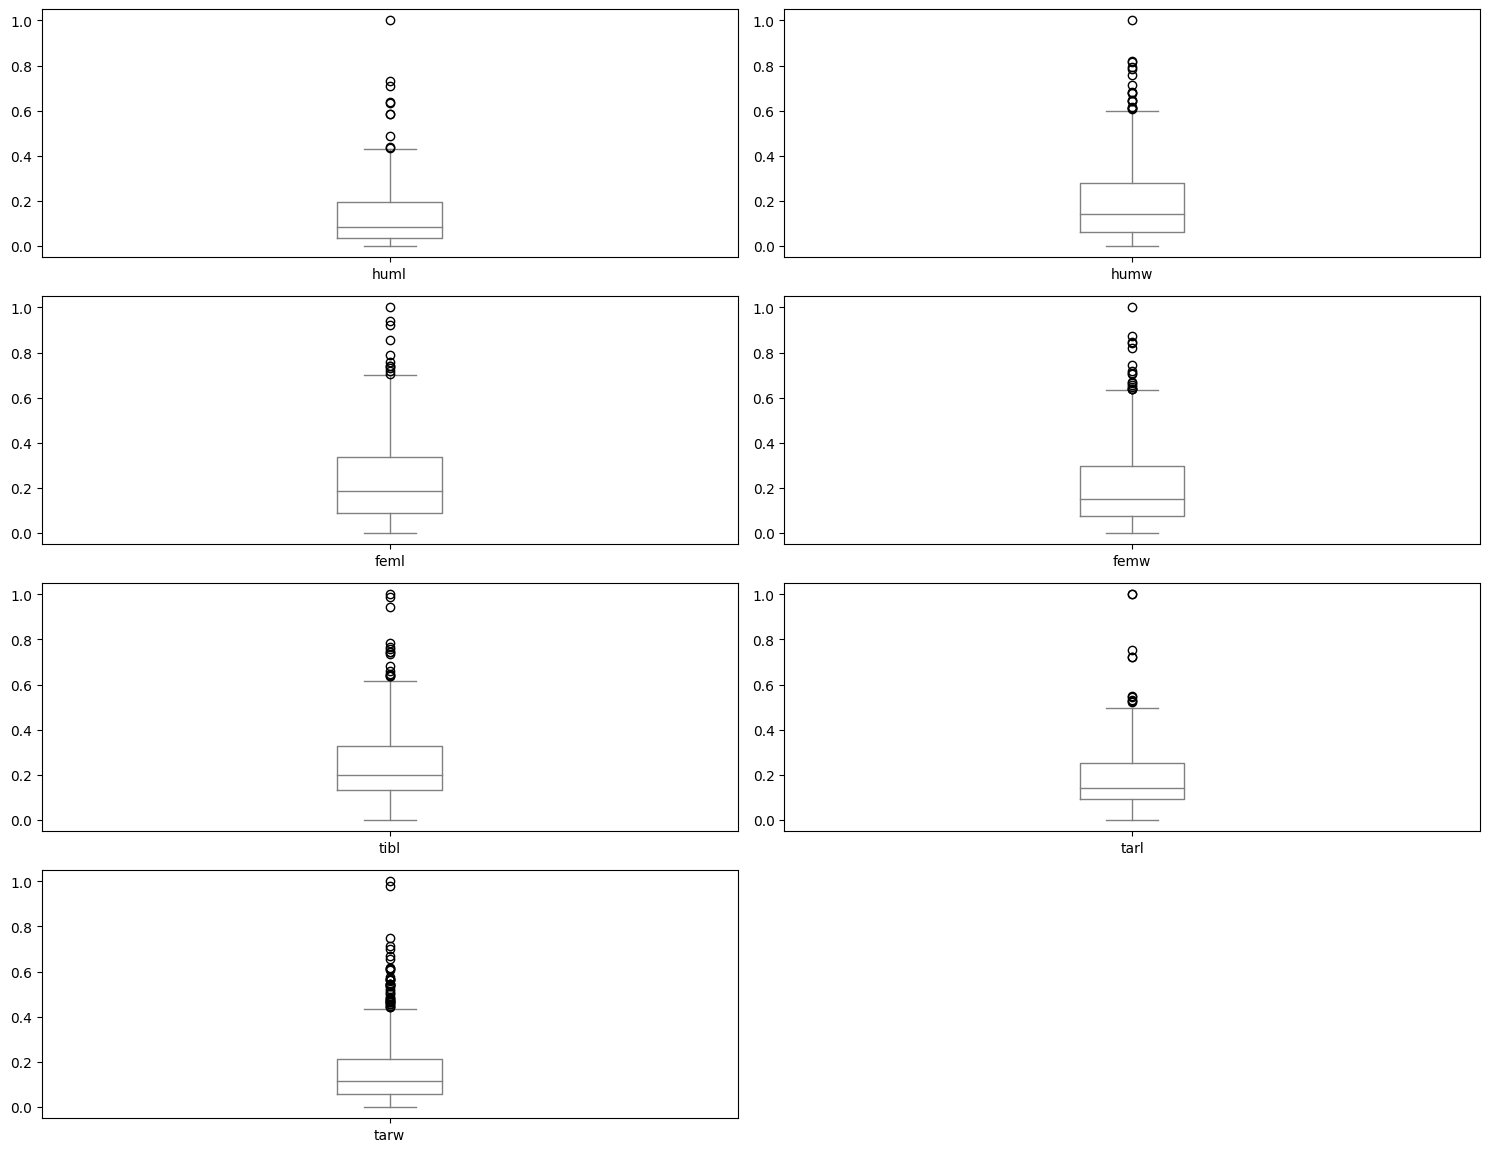

In [35]:
# by using a boxplot for data feature. It was found that all features contain outliers which are the points above the boxes.
Birds.plot(kind='box', subplots=True, layout=(7, 2), figsize=(15, 20), color='grey')

# Show the plot
plt.tight_layout()
plt.show()

<font size="3">This code is identifying and removing outliers from the dataframe by using the **Interquartile Range (IQR)** method.</font>

In [36]:
Features = ['huml','humw','feml','femw','tibl','tarl','tarw']
for feature in Features:
    # Finding the IQR
    percentile25 = Birds[feature].quantile(0.25)
    percentile75 = Birds[feature].quantile(0.75)
    iqr= percentile75 - percentile25  
    # Finding Upper and Lower Limit
    upper_limit = percentile75 + 1.5 *iqr
    lower_limit = percentile25 - 1.5 *iqr
    # removing outleirs
    Birds = Birds.loc[(Birds[feature] > lower_limit) & (Birds[feature] < upper_limit)]    

In [37]:
Birds.shape

(337, 8)

### Splitting the data to train,test and validation sets.

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Split the dataset into features and labels
X = Birds.drop(['type'], axis=1) # x contains all features with the absence of the 'type' column
y = Birds['type']

# Split the dataset into training, validation, and testing sets
# First, split into training (70%) and temp (30%: will be split into validation and test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Now, split the temp set into validation (15%) and test (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


### <ins>Scaling the data Using MinMaxScaler:</ins>

<font size="3">Given that the feature ranges are different, our data needs to be scaled. utilising the **sklearn MinMaxScaler** to normalise a data set's columns such that they are all the same scale.</font>

In [39]:
scaler= MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

### Balancing the train data using SMOTE :

<font size="3"> SMOTE (Synthetic Minority Over-sampling Technique) is an algorithm used to balance imbalanced datasets by generating synthetic samples for the minority class.</font>

#### Checking the actual balance :

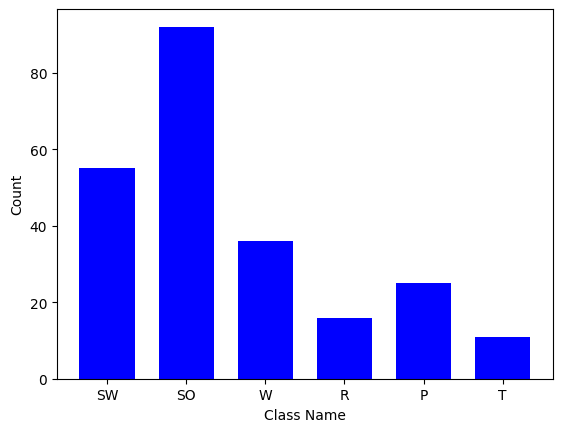

In [40]:
# Import necessary libraries
import matplotlib.pyplot as plt
from collections import Counter

# Get the counts of each class in the training data
class_counts = Counter(y_train)

# Plot a bar chart with the counts of each class
plt.bar(class_counts.keys(), class_counts.values(), width=0.7, color='blue')

# Add labels to the x-axis and y-axis
plt.xlabel('Class Name')
plt.ylabel('Count')

# Show the plot
plt.show()

In [41]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE()

# Oversampling the train data
X_train,y_train = smote.fit_resample(X_train,y_train)

#### Checking if the data is balanced properly :

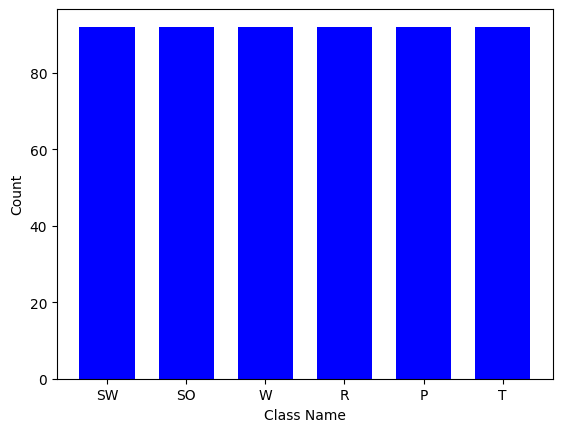

In [44]:
# Import necessary libraries
import matplotlib.pyplot as plt
from collections import Counter

# Get the counts of each class in the training data
class_counts = Counter(y_train)

# Plot a bar chart with the counts of each class
plt.bar(class_counts.keys(), class_counts.values(), width=0.7, color='blue')

# Add labels to the x-axis and y-axis
plt.xlabel('Class Name')
plt.ylabel('Count')

# Show the plot
plt.show()


### <ins>Converting Categorical Traget classes to numerical using Label Encoding:</ins>

In [47]:
from sklearn.preprocessing import LabelEncoder
#creating instance of labelencoder
labelencoder = LabelEncoder()
# change the category column 'type' to numerical ones. 
y_train= labelencoder.fit_transform(y_train)
y_val = labelencoder.transform(y_val)  # Ensure consistent label encoding
y_test= labelencoder.transform(y_test)

# <ins>Creating the models:</ins>

<font size="3">The goal of this work is to build a model that can categorise six bird species based on information about their bone dimensions. As a result, I used the supervised machine learning methods **Random Forest (RF)**, **K-Nearest Neighbours (KNN)**, **Decision Trees**, **Gradient Boosting**, and **Support Vector Machine (SVM)**, and **Gridsearch** to find the best hyperparameters that will improve improve their performances, These algorithms are used to solve multi-classification issues.<font>

In [48]:
# Import necessary libraries
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import scikitplot as skplt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, log_loss
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import joblib  # or import pickle
import scikitplot as skplt

## <ins>K-Nearest Neighbors (KNN):</ins>

<font size="3">The KNN algorithm is considered to be a simple, yet powerful algorithm that can be used for both classification and regression tasks.</font>

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       0.50      1.00      0.67         1
           2       0.95      0.95      0.95        19
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00         6
           5       1.00      0.75      0.86         8

    accuracy                           0.92        51
   macro avg       0.84      0.91      0.86        51
weighted avg       0.94      0.92      0.93        51



Log Loss: 2.826953206989582
AUC Score: 0.9461304357969391




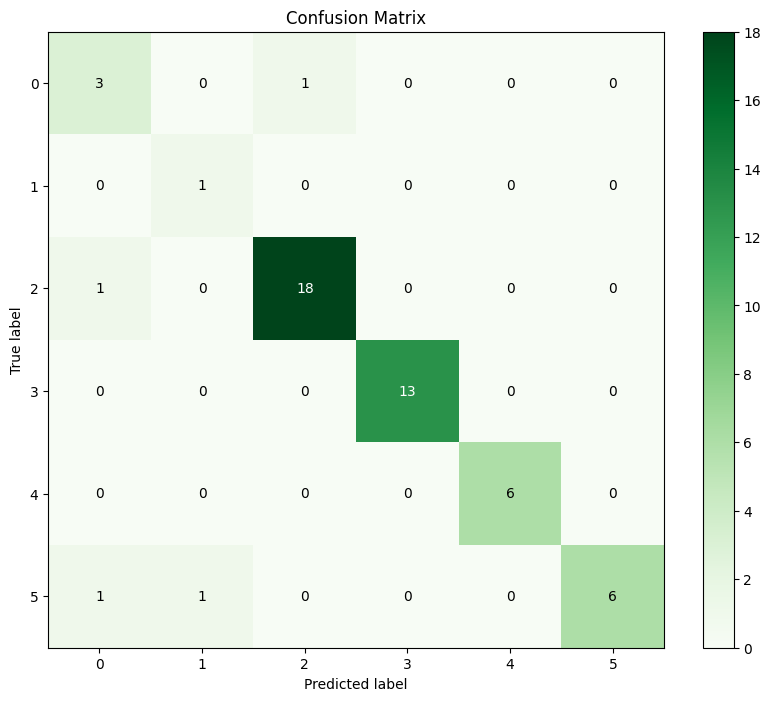

In [49]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier

# Define the KNN classifier
knn = KNeighborsClassifier()

# Define the hyperparameter grid for KNN
param_grid = {'n_neighbors': [1, 3, 4]}

# Create the grid search object
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Predict the test set
y_pred = grid_search.predict(X_test)

y_pred_proba = grid_search.predict_proba(X_test)
    
    
# Calculate the log loss
log_loss_score = log_loss(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba, multi_class ='ovr')


# Plot the confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred, figsize=(10, 8), cmap='Greens')

# Print the classification report
print("K-Nearest Neighbors Classification Report:")
print(classification_report(y_test, y_pred))
print('\n')
print('Log Loss:', log_loss_score)
print('AUC Score:', auc_score)
print('\n')

# Show the plot
plt.show()

In [50]:
# Predict on the validation set
y_val_pred = grid_search.predict(X_val)

# Convert numerical predictions back to original labels
y_val_pred_labels = labelencoder.inverse_transform(y_val_pred)
y_val_labels = labelencoder.inverse_transform(y_val)  # Convert true labels to original labels

# Print the predicted types and true labels for the first 15 samples
print("Predictions and true labels for the first 15 samples:")
for i in range(15):  # Displaying first 15 samples
    print(f"Sample {i}: True Label = {y_val_labels[i]}, Predicted Label = {y_val_pred_labels[i]}")


Predictions and true labels for the first 15 samples:
Sample 0: True Label = SO, Predicted Label = SO
Sample 1: True Label = W, Predicted Label = W
Sample 2: True Label = P, Predicted Label = T
Sample 3: True Label = SW, Predicted Label = SW
Sample 4: True Label = SW, Predicted Label = SW
Sample 5: True Label = SO, Predicted Label = SO
Sample 6: True Label = SO, Predicted Label = SO
Sample 7: True Label = P, Predicted Label = P
Sample 8: True Label = W, Predicted Label = SW
Sample 9: True Label = W, Predicted Label = W
Sample 10: True Label = W, Predicted Label = W
Sample 11: True Label = W, Predicted Label = W
Sample 12: True Label = SO, Predicted Label = SO
Sample 13: True Label = SO, Predicted Label = SO
Sample 14: True Label = W, Predicted Label = SW


## <ins>Random Forest:</ins>

<font size = "3">Random Forest is a supervised machine learning algorithm used for classification and regression problems. It is an ensemble method that combines multiple decision trees to create a more accurate and stable model.</font>


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       0.50      1.00      0.67         1
           2       1.00      1.00      1.00        19
           3       0.86      0.92      0.89        13
           4       1.00      0.83      0.91         6
           5       0.83      0.62      0.71         8

    accuracy                           0.88        51
   macro avg       0.80      0.86      0.81        51
weighted avg       0.90      0.88      0.88        51



Random Forest Log Loss: 0.46316390650395123
Random Forest AUC Score: 0.9800509388296234




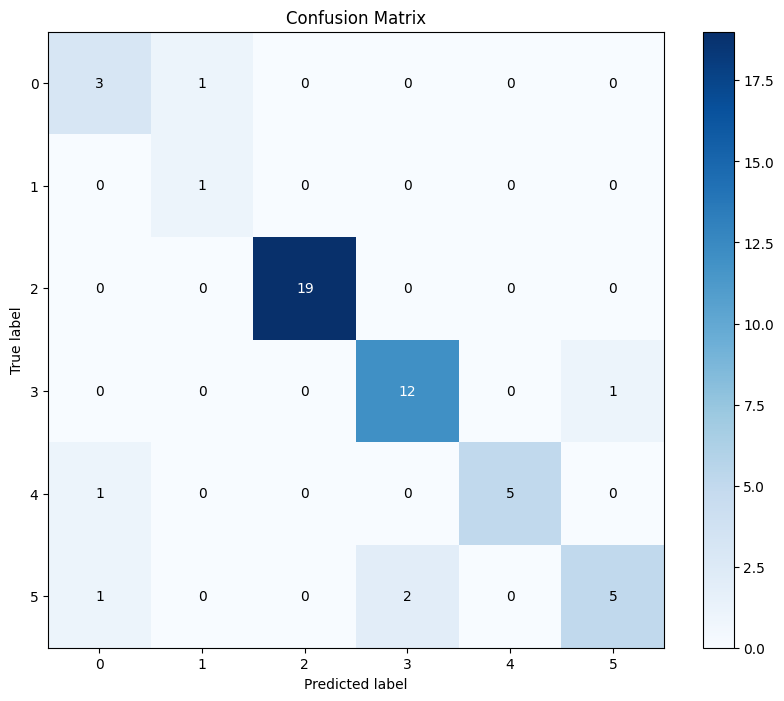

In [51]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest classifier
rf = RandomForestClassifier(random_state =5)

# Define the hyperparameter grid for Random Forest
param_grid = {'n_estimators': [20, 28, 30], 'max_depth': [3, 4, 7]}

# Create the grid search object
grid_search = GridSearchCV(rf, param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Predict the test set
y_pred = grid_search.predict(X_test)

y_pred_proba = grid_search.predict_proba(X_test)
    
    
# Calculate the log loss
log_loss_score = log_loss(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba, multi_class ='ovr')


# Plot the confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred, figsize=(10, 8), cmap='Blues')

# Print the classification report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))
print('\n')
print('Random Forest Log Loss:', log_loss_score)
print('Random Forest AUC Score:', auc_score)
print('\n')

# Show the plot
plt.show()

In [52]:
# Predict on the validation set
y_val_pred = grid_search.predict(X_val)

# Convert numerical predictions back to original labels
y_val_pred_labels = labelencoder.inverse_transform(y_val_pred)
y_val_labels = labelencoder.inverse_transform(y_val)  # Convert true labels to original labels

# Print the predicted types and true labels for the first 15 samples
print("Predictions and true labels for the first 15 samples:")
for i in range(15):  # Displaying first 15 samples
    print(f"Sample {i}: True Label = {y_val_labels[i]}, Predicted Label = {y_val_pred_labels[i]}")


Predictions and true labels for the first 15 samples:
Sample 0: True Label = SO, Predicted Label = SO
Sample 1: True Label = W, Predicted Label = R
Sample 2: True Label = P, Predicted Label = T
Sample 3: True Label = SW, Predicted Label = SW
Sample 4: True Label = SW, Predicted Label = SW
Sample 5: True Label = SO, Predicted Label = SO
Sample 6: True Label = SO, Predicted Label = SO
Sample 7: True Label = P, Predicted Label = P
Sample 8: True Label = W, Predicted Label = W
Sample 9: True Label = W, Predicted Label = W
Sample 10: True Label = W, Predicted Label = W
Sample 11: True Label = W, Predicted Label = R
Sample 12: True Label = SO, Predicted Label = SO
Sample 13: True Label = SO, Predicted Label = SO
Sample 14: True Label = W, Predicted Label = SW


## <ins>Decision Tree:</ins>

<font size="3">Decision trees are a popular tool in data mining and machine learning because they are easy to interpret and visualize. They are also relatively simple to construct and can handle both numerical and categorical data.</font>

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.50      0.44         4
           1       0.33      1.00      0.50         1
           2       1.00      0.95      0.97        19
           3       0.82      0.69      0.75        13
           4       0.83      0.83      0.83         6
           5       0.50      0.50      0.50         8

    accuracy                           0.76        51
   macro avg       0.65      0.75      0.67        51
weighted avg       0.80      0.76      0.77        51



Decision Tree Log Loss: 1.956711257452345
AUC Score: 0.9441779546505581




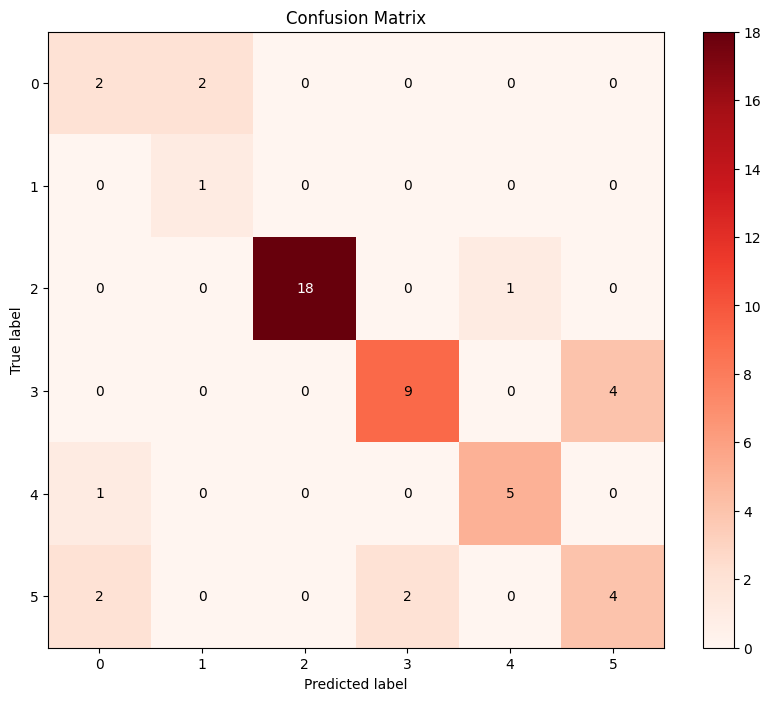

In [53]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier

# Define the decision tree classifier
dt = DecisionTreeClassifier(random_state =42)

# Define the hyperparameter grid for the decision tree
param_grid = {'max_depth': [ 2, 2, 6]}

# Create the grid search object
grid_search = GridSearchCV(dt, param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Predict the test set
y_pred = grid_search.predict(X_test)

y_pred_proba = grid_search.predict_proba(X_test)
    
    
# Calculate the log loss
log_loss_score = log_loss(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba, multi_class ='ovr')


# Plot the confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred, figsize=(10, 8), cmap='Reds')

# Print the classification report
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred))
print('\n')
print('Decision Tree Log Loss:', log_loss_score)
print('AUC Score:', auc_score)
print('\n')

# Show the plot
plt.show()



In [54]:
# Predict on the validation set
y_val_pred = grid_search.predict(X_val)

# Convert numerical predictions back to original labels
y_val_pred_labels = labelencoder.inverse_transform(y_val_pred)
y_val_labels = labelencoder.inverse_transform(y_val)  # Convert true labels to original labels

# Print the predicted types and true labels for the first 15 samples
print("Predictions and true labels for the first 15 samples:")
for i in range(15):  # Displaying first 15 samples
    print(f"Sample {i}: True Label = {y_val_labels[i]}, Predicted Label = {y_val_pred_labels[i]}")


Predictions and true labels for the first 15 samples:
Sample 0: True Label = SO, Predicted Label = W
Sample 1: True Label = W, Predicted Label = R
Sample 2: True Label = P, Predicted Label = T
Sample 3: True Label = SW, Predicted Label = W
Sample 4: True Label = SW, Predicted Label = SW
Sample 5: True Label = SO, Predicted Label = SO
Sample 6: True Label = SO, Predicted Label = SO
Sample 7: True Label = P, Predicted Label = P
Sample 8: True Label = W, Predicted Label = W
Sample 9: True Label = W, Predicted Label = W
Sample 10: True Label = W, Predicted Label = P
Sample 11: True Label = W, Predicted Label = R
Sample 12: True Label = SO, Predicted Label = SO
Sample 13: True Label = SO, Predicted Label = SO
Sample 14: True Label = W, Predicted Label = SW


## <ins>Gradient Boosting:</ins>

<font size="3">To construct a powerful predictive model, Gradient Boosting Classifier integrates a number of weak learning models in order a strong predictive one.</font>

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.50      1.00      0.67         1
           2       1.00      1.00      1.00        19
           3       0.80      0.92      0.86        13
           4       1.00      1.00      1.00         6
           5       0.80      0.50      0.62         8

    accuracy                           0.88        51
   macro avg       0.81      0.86      0.81        51
weighted avg       0.89      0.88      0.88        51



Log Loss: 0.42740964419375677
AUC Score: 0.9899435231686723




<Figure size 1000x800 with 0 Axes>

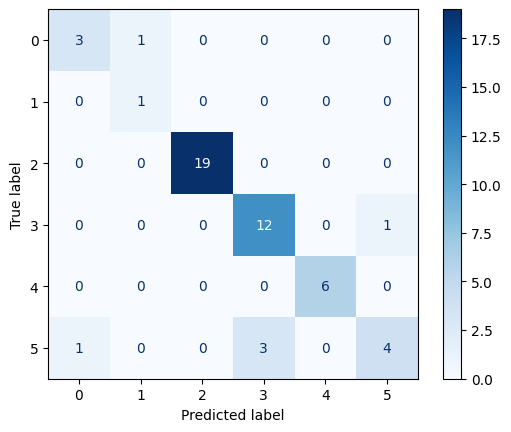

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, log_loss
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score


# Define the Gradient Boosting classifier
gbc = GradientBoostingClassifier()

# Define the hyperparameter grid for Gradient Boosting
param_grid = {'learning_rate': [0.5, 0.6, 0.8],
              'max_depth': [2, 3, 5],
              'min_samples_split': [6, 8, 10]}

# Create the grid search object
grid_search = GridSearchCV(gbc, param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Predict the test set
y_pred = grid_search.predict(X_test)

y_pred_proba = grid_search.predict_proba(X_test)

# Calculate the log loss
log_loss_score = log_loss(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba, multi_class ='ovr')

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

# Print the classification report
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred))
print('\n')
print('Log Loss:', log_loss_score)
print('AUC Score:', auc_score)
print('\n')

# Show the plot
plt.show()

In [56]:
# Predict on the validation set
y_val_pred = grid_search.predict(X_val)

# Convert numerical predictions back to original labels
y_val_pred_labels = labelencoder.inverse_transform(y_val_pred)
y_val_labels = labelencoder.inverse_transform(y_val)  # Convert true labels to original labels

# Print the predicted types and true labels for the first 15 samples
print("Predictions and true labels for the first 15 samples:")
for i in range(15):  # Displaying first 15 samples
    print(f"Sample {i}: True Label = {y_val_labels[i]}, Predicted Label = {y_val_pred_labels[i]}")


Predictions and true labels for the first 15 samples:
Sample 0: True Label = SO, Predicted Label = SO
Sample 1: True Label = W, Predicted Label = R
Sample 2: True Label = P, Predicted Label = T
Sample 3: True Label = SW, Predicted Label = SW
Sample 4: True Label = SW, Predicted Label = SW
Sample 5: True Label = SO, Predicted Label = SO
Sample 6: True Label = SO, Predicted Label = SO
Sample 7: True Label = P, Predicted Label = P
Sample 8: True Label = W, Predicted Label = SW
Sample 9: True Label = W, Predicted Label = W
Sample 10: True Label = W, Predicted Label = W
Sample 11: True Label = W, Predicted Label = R
Sample 12: True Label = SO, Predicted Label = SO
Sample 13: True Label = SO, Predicted Label = SO
Sample 14: True Label = W, Predicted Label = SW


## <ins>Support Vector Machine (SVM):</ins>

<font size="3">SVM works by It works by finding the best boundary or hyperplane that separates the data into different classes.</font>

SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.33      1.00      0.50         1
           2       1.00      0.95      0.97        19
           3       1.00      0.92      0.96        13
           4       0.86      1.00      0.92         6
           5       0.88      0.88      0.88         8

    accuracy                           0.92        51
   macro avg       0.84      0.92      0.85        51
weighted avg       0.95      0.92      0.93        51



SVM Log Loss: 0.30003198259149905
AUC Score: 0.9898579609735553




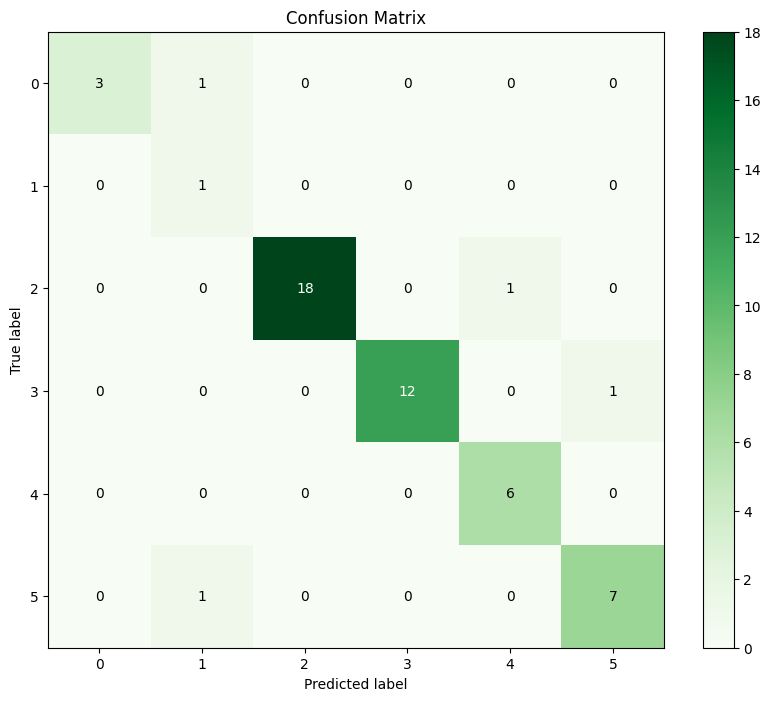

In [57]:
# Import necessary libraries
from sklearn import svm

# Define the SVM classifier
svm = svm.SVC(random_state =42, probability = True)

# Define the hyperparameter grid for the SVM classifier
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Create the grid search object
grid_search = GridSearchCV(svm, param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Predict the test set
y_pred = grid_search.predict(X_test)

y_pred_proba = grid_search.predict_proba(X_test)

# Calculate the log loss
log_loss_score = log_loss(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

# Plot the confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred, figsize=(10, 8), cmap='Greens')

# Print the classification report
print("SVM Classification Report:")
print(classification_report(y_test, y_pred))
print('\n')
print('SVM Log Loss:', log_loss_score)
print('AUC Score:', auc_score)
print('\n')

# Show the plot
plt.show()

In [61]:
# Predict on the validation set
y_val_pred = grid_search.predict(X_val)

# Convert numerical predictions back to original labels
y_val_pred_labels = labelencoder.inverse_transform(y_val_pred)
y_val_labels = labelencoder.inverse_transform(y_val)  # Convert true labels to original labels

# Print the predicted types and true labels for the first 15 samples
print("Predictions and true labels for the first 15 samples:")
for i in range(20):  # Displaying first 15 samples
    print(f"Sample {i}: True Label = {y_val_labels[i]}, Predicted Label = {y_val_pred_labels[i]}")


Predictions and true labels for the first 15 samples:
Sample 0: True Label = SO, Predicted Label = SO
Sample 1: True Label = W, Predicted Label = W
Sample 2: True Label = P, Predicted Label = T
Sample 3: True Label = SW, Predicted Label = SW
Sample 4: True Label = SW, Predicted Label = SW
Sample 5: True Label = SO, Predicted Label = SO
Sample 6: True Label = SO, Predicted Label = SO
Sample 7: True Label = P, Predicted Label = P
Sample 8: True Label = W, Predicted Label = W
Sample 9: True Label = W, Predicted Label = W
Sample 10: True Label = W, Predicted Label = P
Sample 11: True Label = W, Predicted Label = R
Sample 12: True Label = SO, Predicted Label = SO
Sample 13: True Label = SO, Predicted Label = SO
Sample 14: True Label = W, Predicted Label = SW
Sample 15: True Label = SO, Predicted Label = SO
Sample 16: True Label = W, Predicted Label = W
Sample 17: True Label = R, Predicted Label = R
Sample 18: True Label = T, Predicted Label = T
Sample 19: True Label = SW, Predicted Label = 

## Results : 

| <center><font size= "3">name</font></center> | <center><font size="3">Accuracy</font></center> |<center><font size="3">Log loss</font></center> |<center><font size="3">Sensitivity</font></center> |<center><font size="3">AUC score</font></center> |
|----------|----------|----------|----------|----------|
| <center><font size="3">K-Nearest Neighbors</font></center> | <center><font size="3">0.92</font></center>   |<center><font size="3">2.826 </font></center>   |<center><font size="3"> 0.91</font></center>   |<center><font size="3"> 0.946</font></center>   |
| <center><font size="3">Random Forest</font></center>   | <center><font size="3"> 0.88</font></center>   |<center><font size="3"> 0.463</font></center>   |<center><font size="3"> 0.86</font></center>   |<center><font size="3"> 0.980</font></center>   |
| <center><font size="3">Decision Tree</font></center>   | <center><font size="3"> 0.76</font></center>   |<center><font size="3"> 1.956</font></center>   |<center><font size="3"> 0.75</font></center>   |<center><font size="3"> 0.944</font></center>   |
| <center><font size="3">Gradient Boosting</font></center>   | <center><font size="3"> 0.88</font></center>   |<center><font size="3"> 0.427</font></center>   |<center><font size="3"> 0.86</font></center>   |<center><font size="3"> 0.989</font></center>   |
| <center><font size="3">Support Vector Machine</font></center>   | <center><font size="3"> 0.92</font></center>   |<center><font size="3"> 0.300</font></center>   |<center><font size="3"> 0.92</font></center>   |<center><font size="3"> 0.989</font></center>   |


<font size="4">Based on the performance metrics provided, the analysis is as follows:</font><br>

<font size="3">The **K-Nearest Neighbors (KNN)** model shows the **highest accuracy of 0.92**, indicating that it is highly effective at classifying samples correctly. However, its **log loss is relatively high at 2.826**, suggesting that while it is accurate, the confidence in its predictions could be improved. The **AUC score of 0.946** is strong, demonstrating good discriminatory ability between classes.</font><br>

<font size="3">The **Support Vector Machine (SVM)** also achieves a high **accuracy of 0.92**, but it stands out with a **significantly lower log loss of 0.300**, reflecting greater confidence and precision in its probability estimates. **The AUC score of 0.989** is the **highest among all models**, underscoring its exceptional performance in distinguishing between classes.</font><br>

<font size="3">The **Random Forest** model shows good performance with an **accuracy of 0.88** and a **log loss of 0.463**. Its **AUC score of 0.980** indicates a strong capability to discriminate between classes, making it a robust choice.</font><br>

<font size="3">Gradient Boosting provides similar accuracy and AUC score to Random Forest, with an **accuracy of 0.88** and an **AUC score of 0.989**. Its **log loss of 0.427** is also competitive, suggesting it delivers reliable predictions with good confidence.</font><br>

<font size="3">The **Decision Tree** model, while functional, has the **lowest accuracy of 0.76** and a **higher log loss of 1.956** compared to other models. Its **AUC score of 0.944**, though decent, is not as high as the other models, indicating relatively lower performance in class distinction.</font><br>

<font size="3">In summary, the **Support Vector Machine** emerges as the **best-performing** model overall, with a combination of high accuracy, low log loss, and the highest AUC score. The K-Nearest Neighbors model is also strong but could benefit from improved prediction confidence. Random Forest and Gradient Boosting offer competitive performances, while the Decision Tree, although simpler, lags behind in accuracy and confidence.</font>
